In [2]:
import pandas as pd
import seaborn as sns
sns.set_palette(sns.color_palette('bright'))


#

Признаки:

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Загрузите файл HR.csv

In [3]:
df = pd.read_csv('./data/HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.

Определите две самые скоррелированные и две наименее
скоррелированные переменные

In [6]:
cols = [c for c in df.columns if df[c].dtype != 'object']
df[cols].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

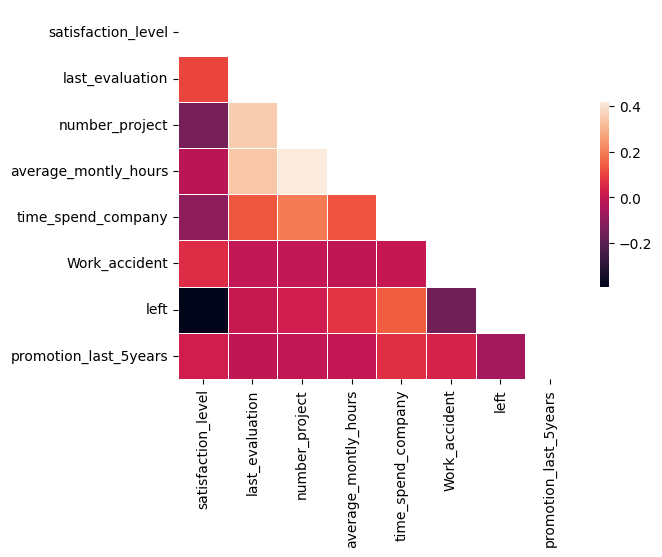

In [7]:
import numpy as np
cor = df[cols].corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap( cor,  mask=mask, linewidths=.5, cbar_kws={"shrink": .5} )

Наиболее скореллированы: 
- "satisfaction level" - "left"

Наименее скореллированы: 
- "average_monthly_hours" - "number_project"

Рассчитайте сколько сотрудников работает в каждом
департаменте

In [8]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

Показать распределение сотрудников по зарплатам.

<Axes: xlabel='salary', ylabel='Count'>

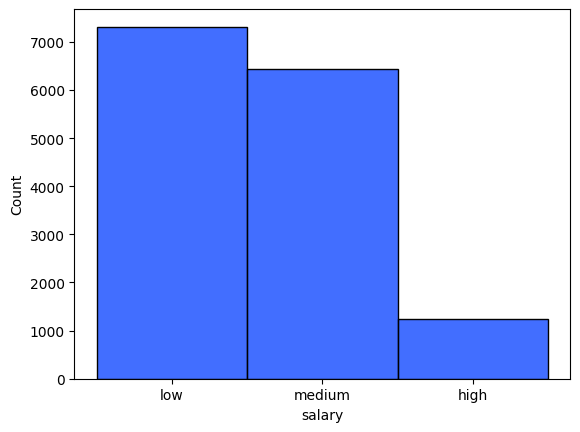

In [9]:
sns.histplot( df, x = 'salary' )

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

<Axes: xlabel='department', ylabel='salary'>

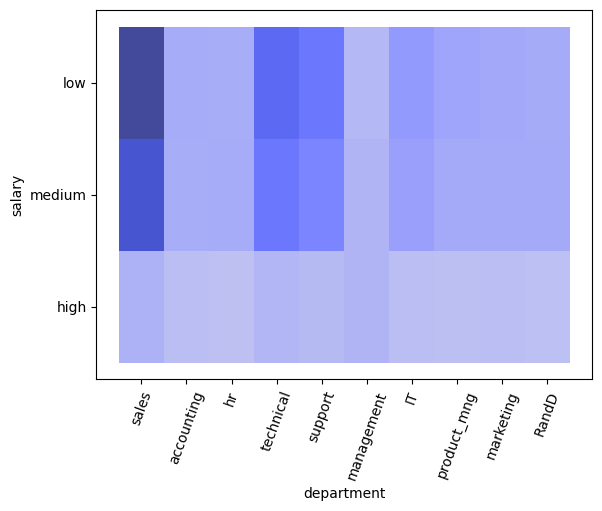

In [10]:
import matplotlib.pyplot as plt

deps = df['department'].unique()
# fig, ax = plt.subplots( len(deps) , sharex=True, aspect = (16,9))

# for i,d in enumerate(deps):
#     sns.histplot(df[df['department'] == d], x = 'salary', ax = ax[i])

# g = sns.FacetGrid( df, row='department')
# g.map(sns.barplot, 'salary', 'department')


g = sns.histplot(df,  x = 'department', y = 'salary',  legend=True )
plt.xticks(rotation=70)
g

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [11]:
highs = df[df['salary'] == 'high']['average_montly_hours']
lows  = df[df['salary'] == 'low']['average_montly_hours']
print(len(highs), len(lows))

1237 7316


<Axes: xlabel='average_montly_hours', ylabel='Count'>

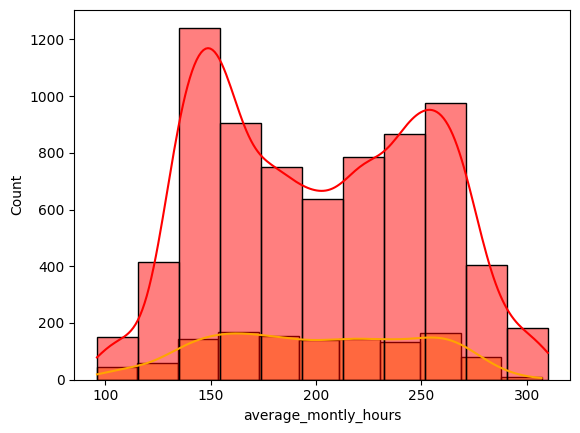

In [43]:
# fig, ax = plt.subplot()

sns.histplot( highs, kde=True, color='orange', binwidth=20)
sns.histplot( lows, kde=True,  color='red',    binwidth=20)


In [69]:
import scipy.stats as stats

alpha = 0.05
r = stats.wilcoxon(
    highs, 
    lows.sample(len(highs)), 
    alternative='greater' # у высоких зарплат БОЛЬШЕ среднее время
)
r

# print(htest_res)
if r.pvalue > alpha:
    print("H_0: Среднее время у высоких зарплат одинаково или меньше")
else:
    print("H_1: Среднее время больше у высоких зарплат больше")

H_0: Среднее время у высоких зарплат одинаково или меньше


Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

In [71]:
active = df[df['left'] == False]
active

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [72]:
fired = df[df['left'] == True]
fired

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Доля сотрудников с повышением за последние 5 лет

In [83]:
print( 'Доля сотрудников с повышением (оставшиеся) =', len(active[ active['promotion_last_5years'] == 1 ]) / len(active) * 100, '%' )
print('Доля сотрудников с повышением (уволенные)  =',  len(fired[ fired['promotion_last_5years'] == 1 ]) / len(fired) * 100, '%' )

Доля сотрудников с повышением (оставшиеся) = 2.6251312565628284 %
Доля сотрудников с повышением (уволенные)  = 0.5320638476617194 %


Средняя степень удовлетворенности

In [85]:
df.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Среднее количество проектов

In [86]:
df.groupby('left')['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [87]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
X = df[[ 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'  ]]
y = df['left']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [110]:
print('Accuracy (train): ', accuracy_score(y_train, lda.predict(X_train))  )
print('Accuracy (test) : ', accuracy_score(y_test, lda.predict(X_test))  )

Accuracy (train):  0.761646803900325
Accuracy (test) :  0.7613333333333333
